In [1]:
import keras
import tensorflow as tf
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch
from tqdm import tqdm

In [2]:
class dataset(Dataset):
  def __init__(self,test=False,transf=transforms.ToTensor()):
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    if test:
      self.data, self.labels=x_test,y_test
    else:
      self.data, self.labels=x_train, y_train
    self.trans=transf
  
  def __len__(self): return len(self.labels)

  def __getitem__(self, index):
    return self.trans(self.data[index]),self.labels[index]

In [3]:
def train_model(model, data_loader, loss, optimizer, epochs):
  device=torch.device('cuda:0')
  model.to(device)
  model.train()
  loss_list=[]
  b_list=[]
  for epoch in range(epochs):
    model.train()
    for data, _ in tqdm(train_data_load):
      #model.to(device)
      #labels=labels.to(device)
      data=data.reshape(-1,784)
      data=data.to(device)
      output=model(data)
      #prob=nn.Softmax(dim=1)
      #predictions=prob(output)
      batch_loss=loss(output, data)
      optimizer.zero_grad()
      batch_loss.backward()
      optimizer.step()
      b_list.append(batch_loss.cpu().detach().numpy())
    loss_list.append(sum(b_list)/len(b_list))
  return loss_list

In [ ]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(784,400)
    self.layer2=nn.Linear(400,200)
    self.layer3=nn.Linear(200,100)
    self.layer4=nn.Linear(100,200)
    self.layer5=nn.Linear(200,400)
    self.layer6=nn.Linear(400,784)

  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    x=self.layer4(x)
    x=self.layer5(x)
    x=self.layer6(x)

    return x

model=model()
loss=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters())

train_data=dataset()
train_data_load=DataLoader(train_data, batch_size=64, shuffle=True)

loss_list=train_model(model, train_data_load, loss, optimizer, epochs=50)

 11%|█         | 104/938 [00:00<00:05, 164.48it/s]

In [10]:
model.eval()

test_data=dataset(test=True)
test_data_loader=DataLoader(test_data, batch_size=16, shuffle=True)

for data,_ in test_data_loader:
  device=torch.device('cuda:0')
  data=data.reshape(-1,784)
  data=data.to(device)
  predictions=model(data)
  break

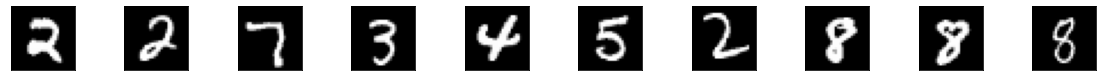

In [11]:
import matplotlib.pyplot as plt
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(data[i].cpu().detach().numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

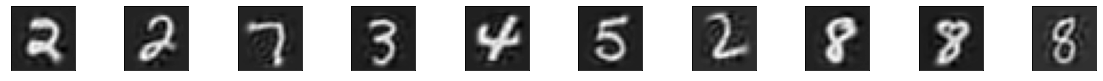

In [12]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(predictions[i].cpu().detach().numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
loss_list

[0.014684647578360842,
 0.010926461894748244,
 0.009419264791959628,
 0.008632326721281273,
 0.008157994320441378,
 0.007838783626177884,
 0.007605485348618143,
 0.007431413486241492,
 0.007291590583933664,
 0.007181588137673257,
 0.0070894962794252675,
 0.007012437701937838,
 0.006945363601279543,
 0.006887725932942604,
 0.006835877009043265,
 0.006791371616629461,
 0.006749908284896374,
 0.0067129874922109214,
 0.006679352252510968,
 0.006649326409217216,
 0.006621117237317051,
 0.0065953650048847815,
 0.006571472079240223,
 0.006549694639492936,
 0.0065287133549520775,
 0.006509569736754521,
 0.006491623282663346,
 0.006475412977171879,
 0.006459189427373704,
 0.006444050500109161]